<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2026/blob/main/notes/08-kleene.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2023 /content/theory
%cd -q /content/theory/notes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.5/536.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# Notebook 8: NFAs to regular expressions

<div class="alert alert-info"><p><b>Read</b> (or reread) Lemma 1.60 and its proof.</p>
</div>


Today we're completing the proof from last time by converting NFAs to regular expressions. The algorithm for this is known as _Kleene's algorithm_ or the _state elimination_ algorithm, because it eliminates the states of the NFA one by one. It also has connections with [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination) in linear algebra and the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm) for finding the shortest paths in a directed graph.

It is traditional in Theory of Computing courses for students to become proficient in actually converting NFAs to regular expressions, but it's enough for you to understand the basic idea and to be convinced that it always works.

To make this construction simpler, the new concept of a generalized NFA (GNFA) is introduced. In this course, GNFAs are a "throwaway" formalism; they exist just to make this proof possible. But elsewhere they might be useful in their own right. A GNFA is a NFA whose transitions can be labeled with regular expressions instead of symbols. A GNFA can follow a transition if the next $k \geq 0$ symbols match the regular expression; when it follows the transition, it consumes those $k$ symbols.

Here's the big picture of the algorithm:

1. Preprocess the NFA so it has a single start state with no incoming edges and a single accept state with no outgoing edges.
2. For each non-start, non-accept state $q$:
    1. Eliminate $q$ (see below).
    2. Merge any parallel transitions.
3. There is only one transition, labeled with a regular expression equivalent to the original NFA.

First, the algorithm changes the NFA so it has a single start state with no incoming edges and a single accept state with no outgoing edges.

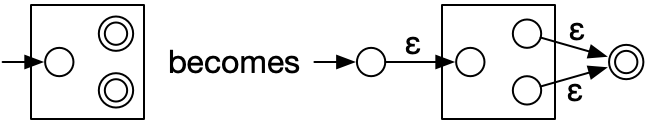

This makes the final step of the algorithm simpler.

(The book also creates a lot of transitions labeled $\emptyset$; these are not shown in the figures below, and they're not shown in the book, either. In fact, as far as I'm concerned, you can pretend they don't exist.)

Second, the algorithm then eliminates the (non-start, non-accept) states one by one. The general procedure is to eliminate state $q$ is, for all incoming transitions and all outgoing transitions of $q$, do:

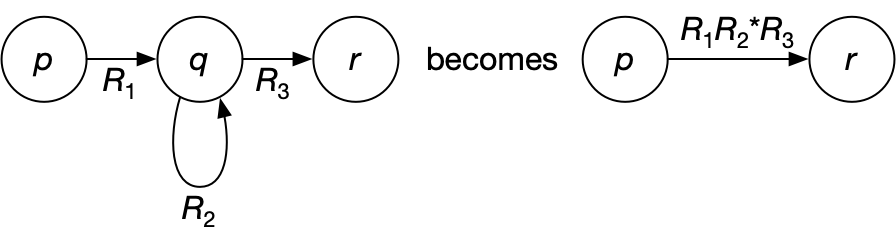

But this is definitely something that will be clearer by example.

The order of elimination is arbitrary, although some orders may lead to more compact regular expressions than others. Tock eliminates states in reverse alphabetical order, for no particularly good reason.

After eliminating each state, we also merge any parallel transitions (transitions that have the same "from" and "to" states):

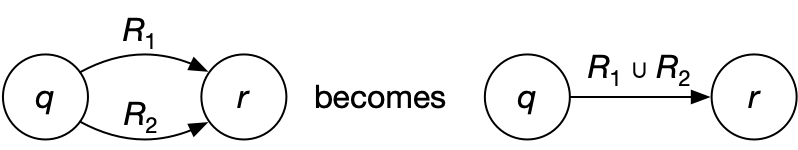

Finally, when there is just one transition left, its label is the final answer. (If you're not using $\emptyset$ transitions, then there is a special case: if there are no transitions left, then the answer is $\emptyset$.)

Let's start with a simpler example than the one in the book, a NFA whose state diagram is *acyclic*.

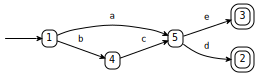

In [ ]:
m = read_csv('dfa-acyclic.csv')
m

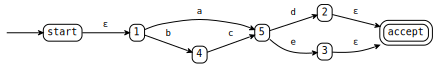

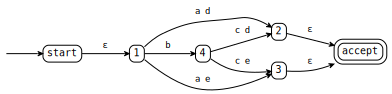

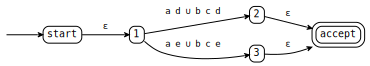

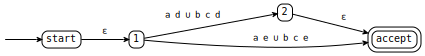

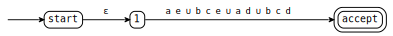

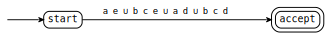

In [ ]:
to_regexp(m, display_steps=True)

The first state to be eliminated is 5. This state has two incoming transitions (a and c) and two outgoing transitions (d and e). In order for the new GNFA to be equivalent to the old one, we have to create four transitions to replace the deleted ones: ad, ae, cd, and ce.

The next state to be eliminated is 4. This creates two new transitions (bce and bde), but since there are already transitions parallel to these (ae and ad), the new transitions are merged with the old ones.

Eliminating state 2 is not very interesting; neither is eliminating state 3, except note again that parallel transitions are unioned.

Now here's an example with a cycle in it; these give rise to Kleene stars in the resulting expression.

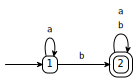

In [ ]:
m66 = read_csv('dfa-1-66.csv')
m66

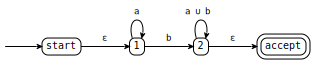

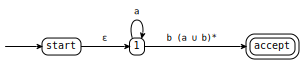

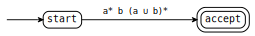

In [ ]:
to_regexp(m66, display_steps=True)

Eliminating state 2 looks similar to before, but the self-loops turn into subexpressions inside Kleene stars.

One more example from the book:

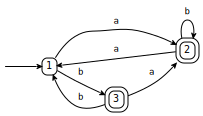

In [ ]:
m68 = read_csv('dfa-1-68.csv')
m68

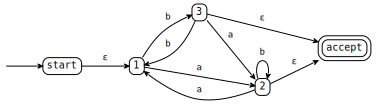

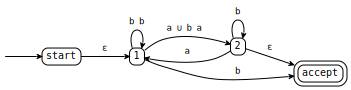

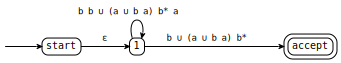

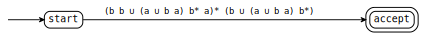

In [ ]:
to_regexp(m68, display_steps=True)

(The answer is different from the book's because the elimination order was different.)